# 1-4. データ分析 - 単回帰分析

単回帰分析とは，ある1つの説明変数$x$から1つの目的変数$y$を導出する回帰モデル$y=ax+b$について，最小二乗法を用いて回帰係数$a,b$を学習することである．

[メディア芸術データベース・ラボ](https://mediag.bunka.go.jp/madb_lab/)上のデータを利用して，簡単な単回帰分析のサンプルコードを見ていこう．


## データセットの準備
以下では，[メディア芸術データベース](https://mediag.bunka.go.jp/madb_lab/lod/download/)のデータを利用し，バンダイビジュアルが提供するアニメビデオパッケージについて，価格を目的変数，収録時間を説明変数として単回帰分析を行う．
上記のリンクから「アニメビデオパッケージ」の「.json」ファイルをダウンロードした後，このノートブックにアップロードしよう．

※「1-4. 単回帰分析」，「1-4. ロジスティック回帰分析」，「1-5. 1～3次元の図表化」,「1-5. 関係性の可視化（ネットワーク構造）」，「1-7. ソートアルゴリズム」，「1-7. 探索アルゴリズム」，「2-5. データ加工」，「3-3. 機械学習」は同じデータセットを利用するため，もし同じものを持っている場合は以下の取得作業は不要である．そちらをアップロードしよう．

ファイルサイズがとても大きいためアップロードには時間がかかる．ファイル名が反映されたことを確認するだけでなく，ファイルアップロード時の画面の下部にあるアップロードの進捗を示す円形のバーが全て進行するまで待ってから作業しよう．（およそ5分程度）

In [ ]:
import json
import pandas as pd
from numpy.polynomial import Polynomial
import numpy as np
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

json_open = open('/content/metadata_an-item_an202_00001.json', 'r')
json_load = json.load(json_open, strict=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=fa120325802f86236a562a76ba504dc3d354ffb5c3b9bb3f5c2f11245e6df6aa
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


## 単回帰分析

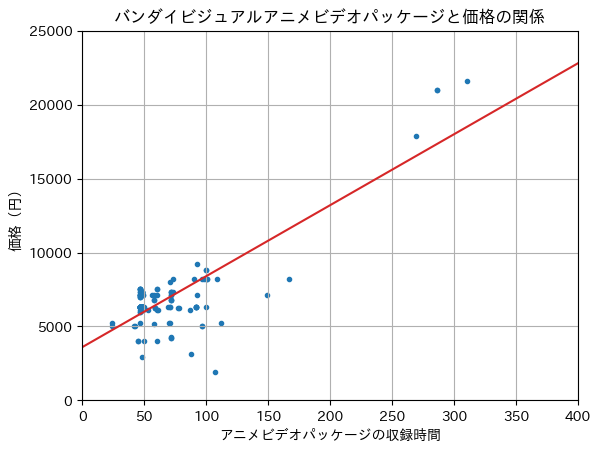

In [ ]:
#データの前処理
df = pd.DataFrame(json_load['@graph'])
df = df[['materialExtent','price','label','publisher']].dropna(how='any') #欠損値も処理
df=df[df['publisher'].str.contains('バンダイビジュアル')]
#文字列処理
df['price'] = df['price'].str.extract(r'(\d+)', expand=False)
df['long']=df['materialExtent'].str.extract(r'(\d+)分', expand=False)

df['price']=df['price'].astype(int)
df['long']=df['long'].astype(int)

#グラフ表示する関数
def show_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'tab:red')
    ax.set_title('バンダイビジュアルアニメビデオパッケージと価格の関係')
    ax.set_xlabel('アニメビデオパッケージの収録時間')
    ax.set_ylabel('価格（円）')
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 25000)
    ax.grid()
    plt.show()

#回帰直線をフィッティングする
W = Polynomial.fit(df['long'], df['price'], 1)
result_x = np.linspace(0, 1200, 100)
result_y = W(result_x)

#プロット
show_graph(df['long'], df['price'], result_x, result_y)